## Sleep, Health and Lifestyle Analysis Portfolio 4

In [87]:
student_name = 'Tanisha Chokhani'
student_id = '48165123'

### Dataset Overview:

The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

### Dataset Columns:

- **Person ID**: An identifier for each individual in the dataset
- **Gender**: The gender of the person (Male/Female)
- **Age**: The age of the person in years.
- **Occupation**: The occupation or profession of the person.
- **Sleep Duration (hours)**: The number of hours the person sleeps per day.
- **Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10
- **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
- **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- **Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.
- **Daily Steps**: The number of steps the person takes per day.
- **Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [89]:
#Display the DataFrame
df = pd.read_csv('Sleep_health_and_lifestyle_dataset 2.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [90]:
# Exploring the dataset:

df.info()

print('''
--------------------------------------''')

# Printing the columns:

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

---------------------

In [91]:
#counting number of Null values in each column
df_count = df.isna().sum()
print(df_count)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [92]:
#Removing records with Sleep disorder - 'none'
df1 = df.dropna()
df1.shape

(155, 13)

In [93]:
#Printing length of data before removing missing values
print("Length of data before removing missing values: " + str(len(df)))

#Printing length of data after removing missing values
print("Length of data after removing missing values: " + str(len(df1)))

Length of data before removing missing values: 374
Length of data after removing missing values: 155


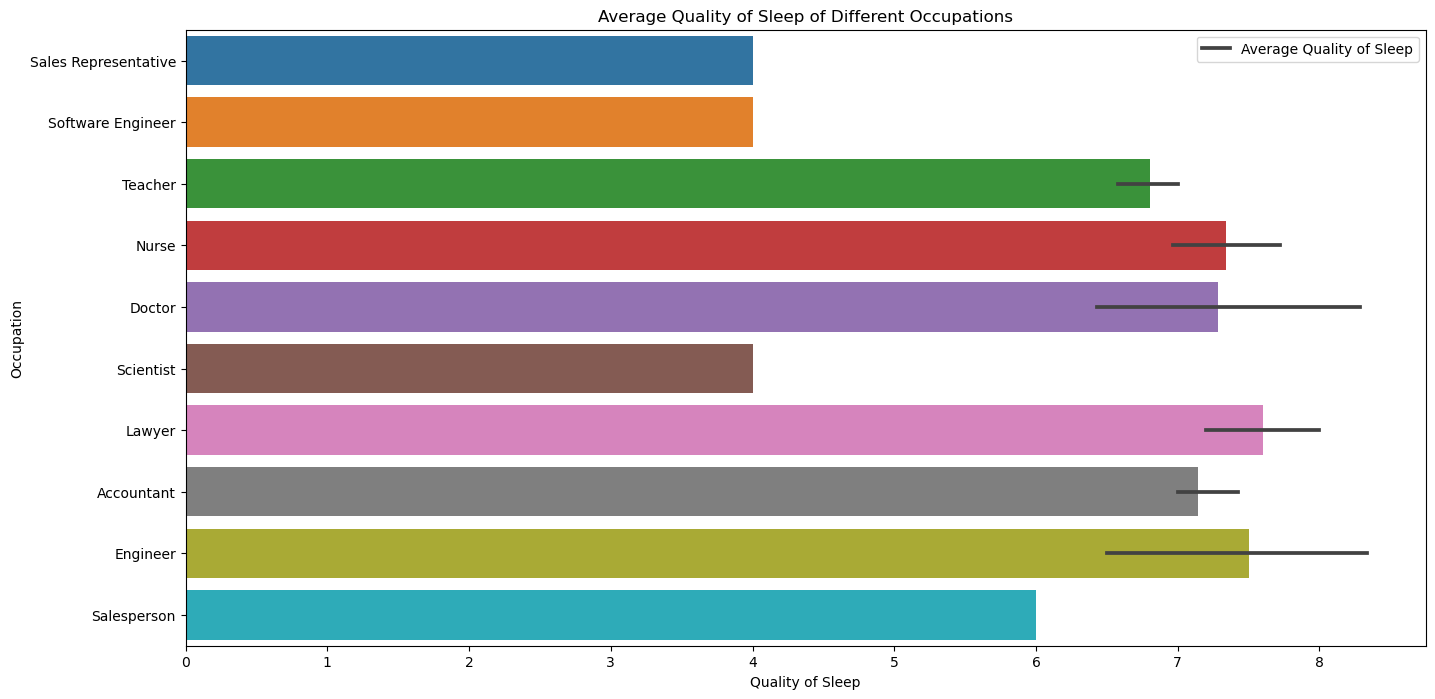

In [94]:
df2 = df1.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16, 8))
sns.barplot(data=df1, x='Quality of Sleep', y='Occupation')
plt.legend(['Average Quality of Sleep'])
plt.title('Average Quality of Sleep of Different Occupations');

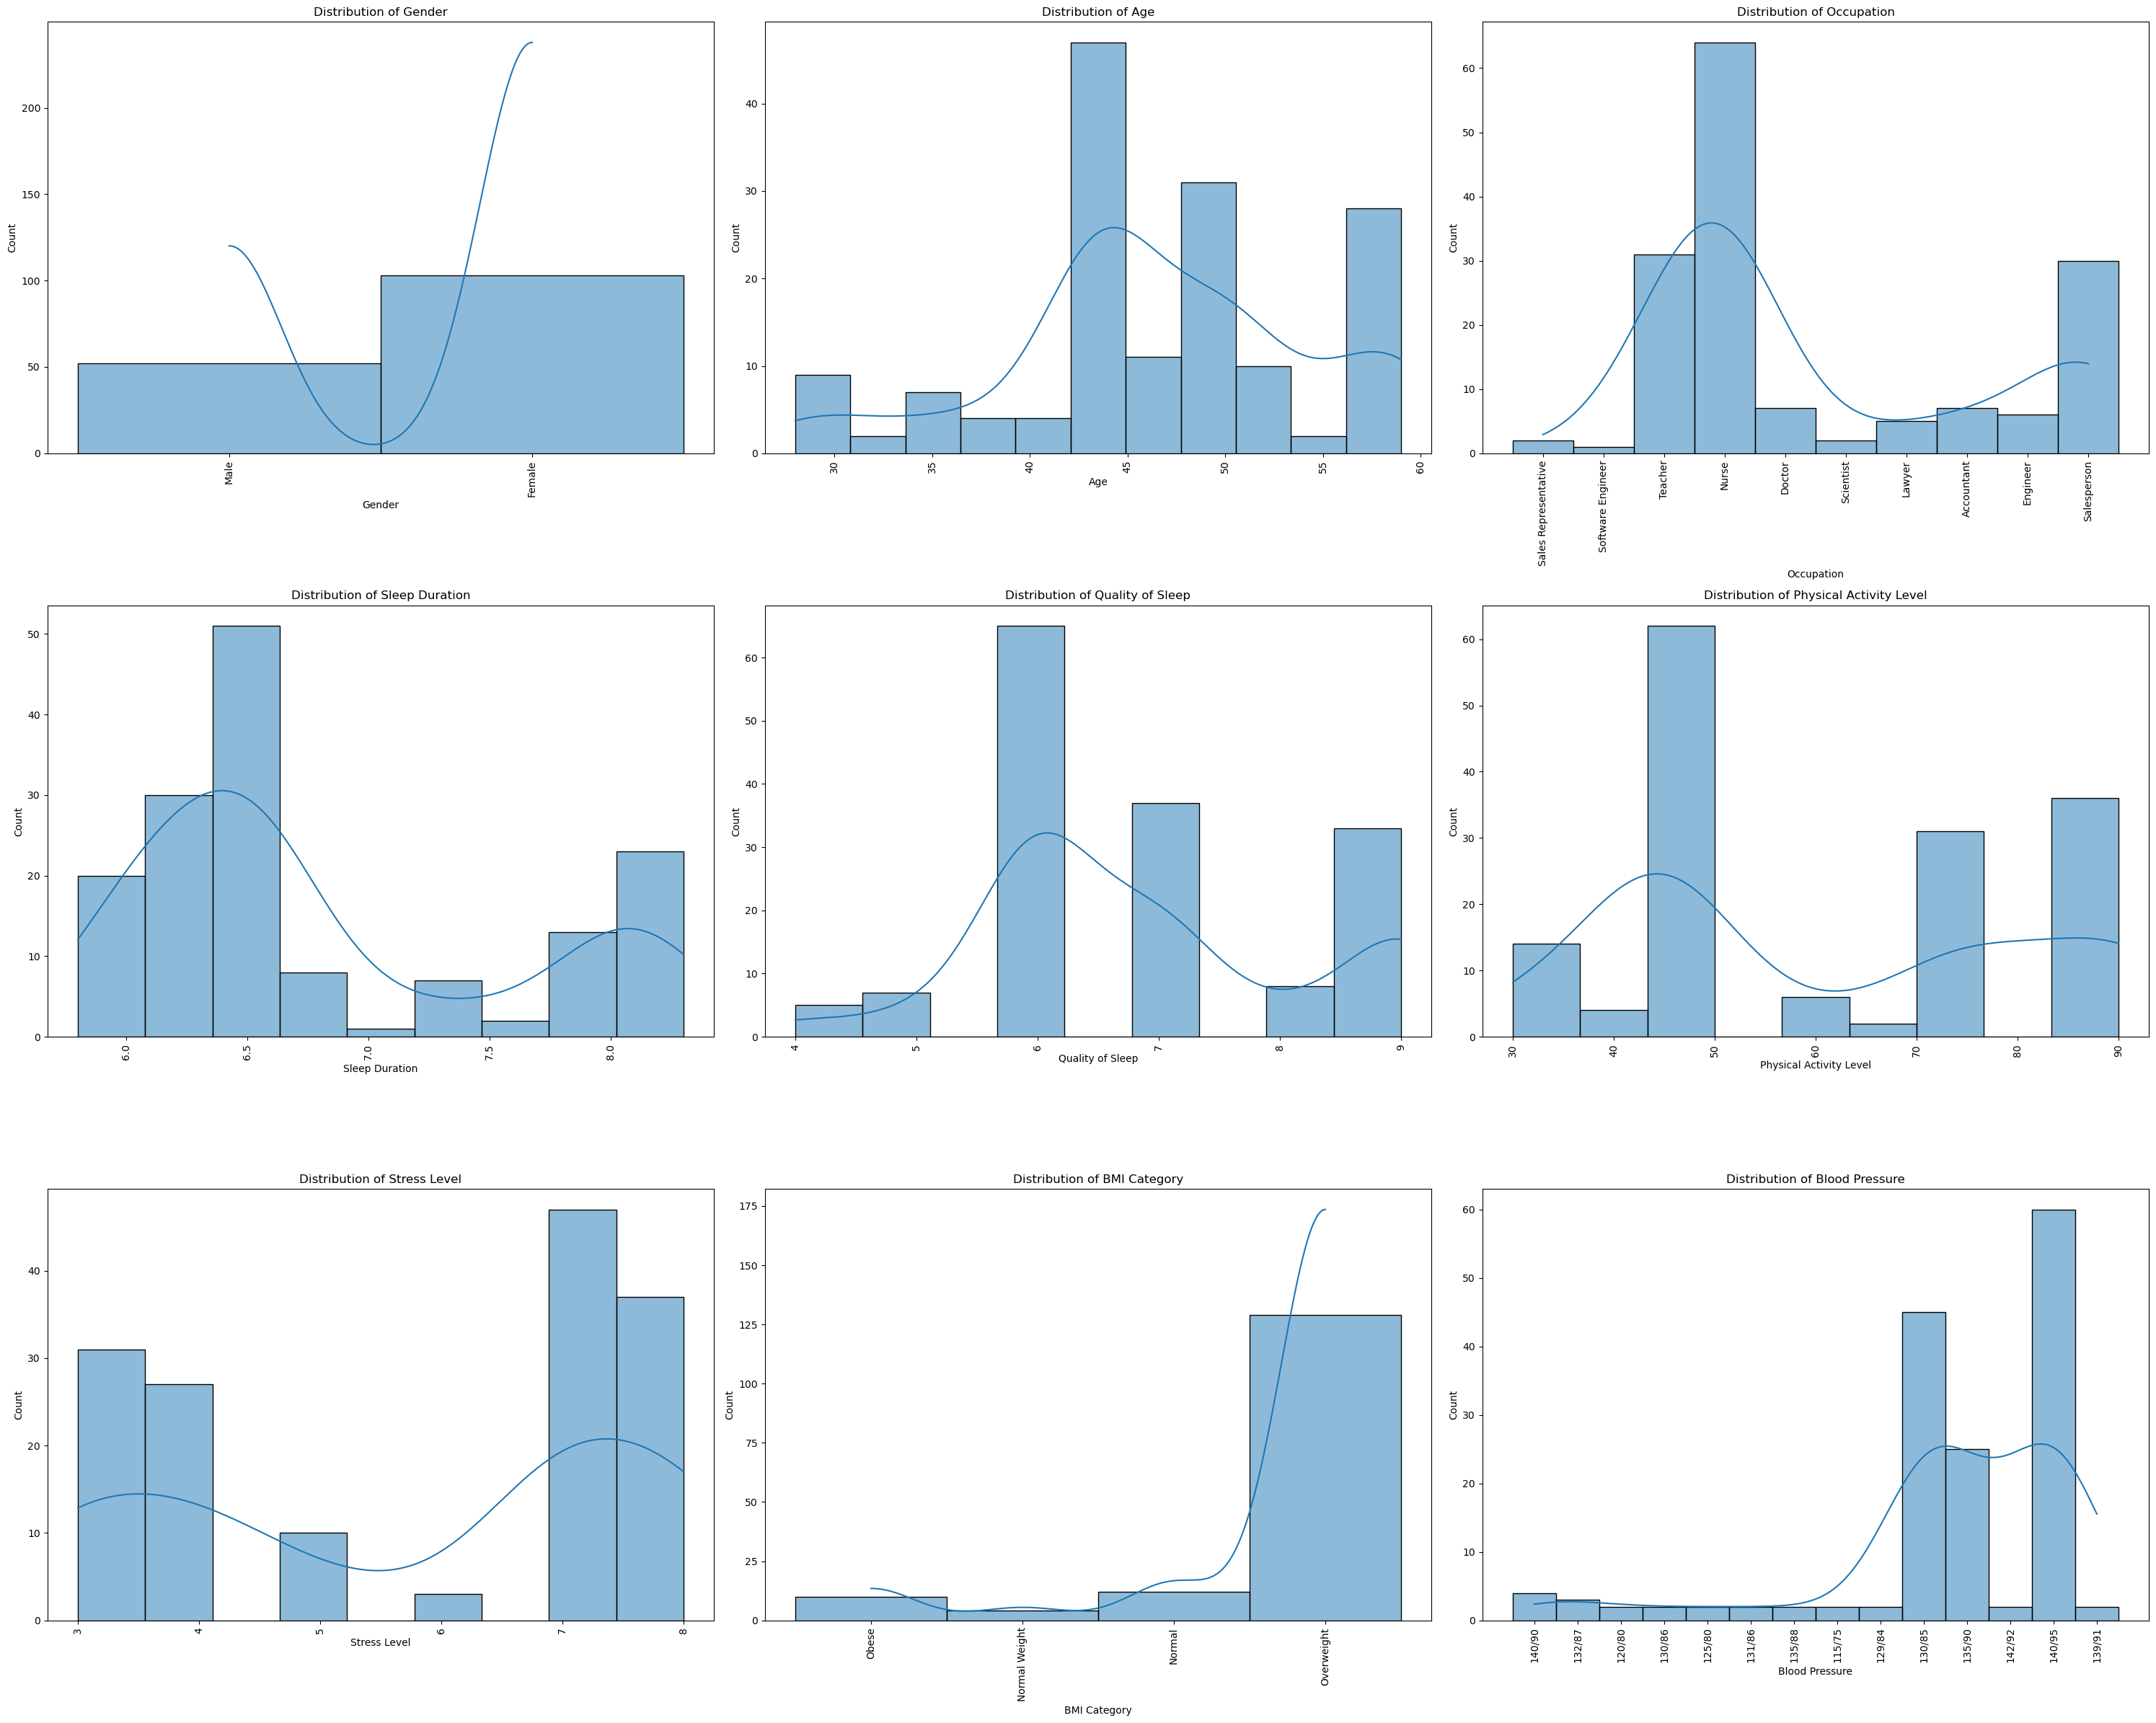

In [95]:
#Exploratory Data Analysis
plt.figure(figsize=(30, 24))

# Defining the number of rows and columns for the subplots
num_rows = 3
num_cols = 3

# Plotting each column separately

plt.subplot(num_rows, num_cols, 1)
sns.histplot(df1[df1.columns[1]], kde=True)
plt.title(f"Distribution of {df1.columns[1]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 2)
sns.histplot(df1[df1.columns[2]], kde=True)
plt.title(f"Distribution of {df1.columns[2]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 3)
sns.histplot(df1[df1.columns[3]], kde=True)
plt.title(f"Distribution of {df1.columns[3]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 4)
sns.histplot(df1[df1.columns[4]], kde=True)
plt.title(f"Distribution of {df1.columns[4]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 5)
sns.histplot(df1[df1.columns[5]], kde=True)
plt.title(f"Distribution of {df1.columns[5]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 6)
sns.histplot(df1[df1.columns[6]], kde=True)
plt.title(f"Distribution of {df1.columns[6]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 7)
sns.histplot(df1[df1.columns[7]], kde=True)
plt.title(f"Distribution of {df1.columns[7]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 8)
sns.histplot(df1[df1.columns[8]], kde=True)
plt.title(f"Distribution of {df1.columns[8]}")
plt.xticks(rotation=90)

plt.subplot(num_rows, num_cols, 9)
sns.histplot(df1[df1.columns[9]], kde=True)
plt.title(f"Distribution of {df1.columns[9]}")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

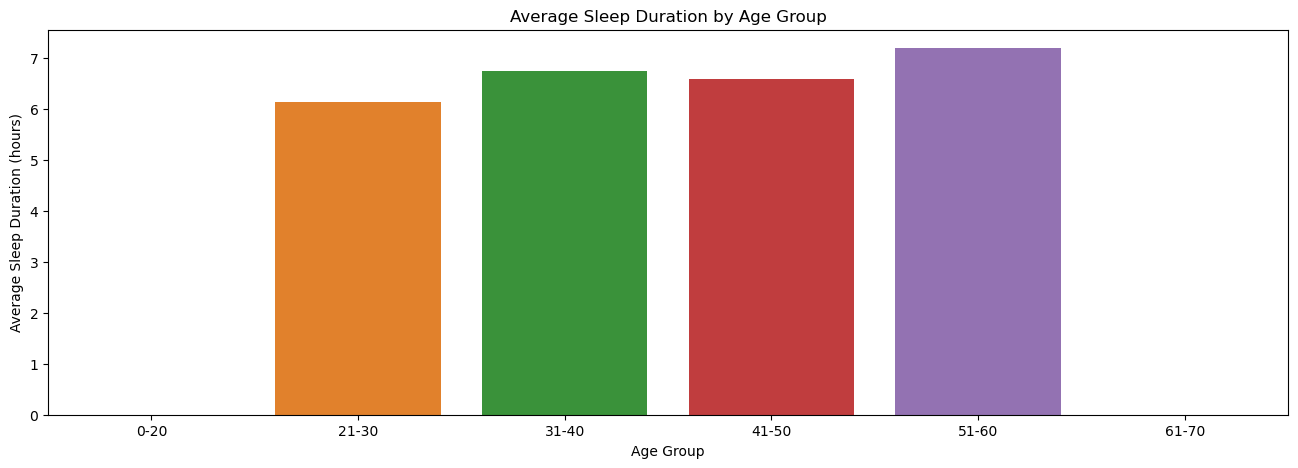

In [96]:
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_labels = ['0-20','21-30', '31-40', '41-50', '51-60','61-70']

df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(16,5))

# Bar chart for average sleep duration by age group
sns.barplot(x='Age Group', y='Sleep Duration', data=df1, ci=None)
plt.title('Average Sleep Duration by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sleep Duration (hours)')

plt.show()


This graph shows that younger individuals have lower average sleep duration than older people

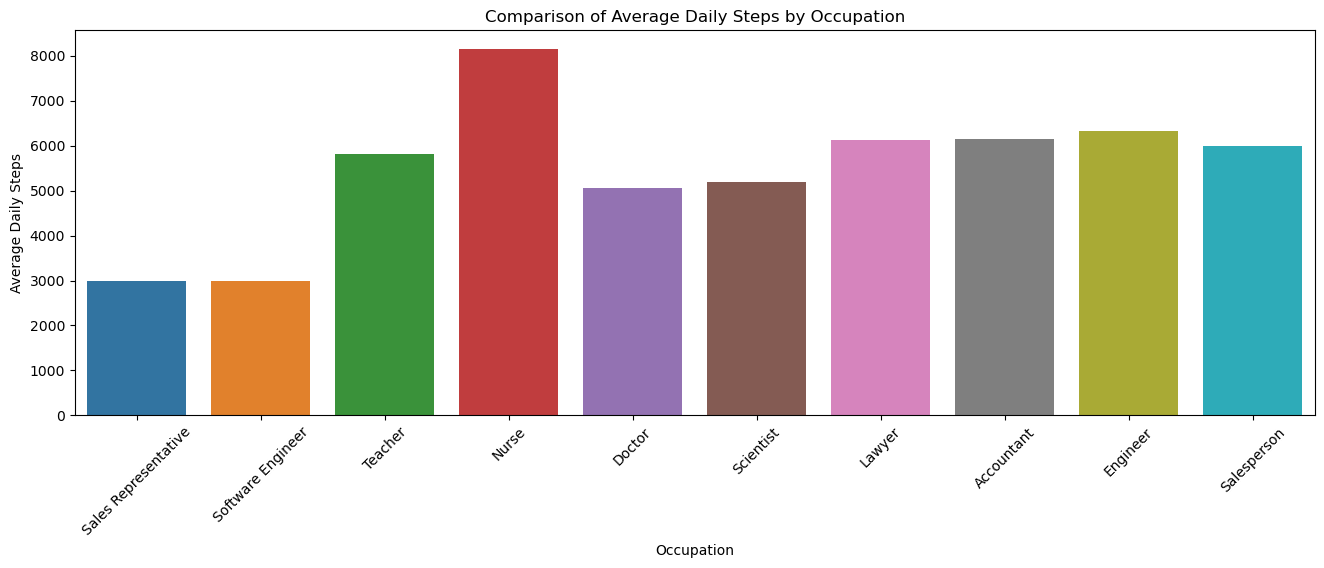

In [97]:
plt.figure(figsize=(16,5))
sns.barplot(x="Occupation", y="Daily Steps", data=df1, ci=None)
plt.title("Comparison of Average Daily Steps by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Daily Steps")
plt.xticks(rotation=45)
plt.show()

This graph shows that Nurse has the higher average daily steps than any other occupation

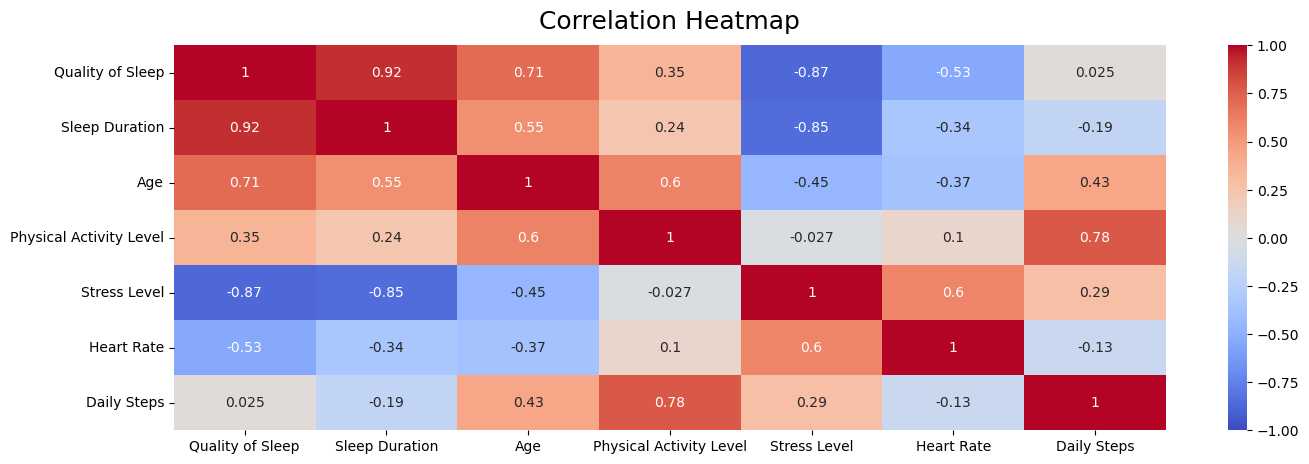

In [98]:
correlation_table = df1[["Quality of Sleep", "Sleep Duration", "Age", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]].corr()

plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation_table, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

#### According to the Correlation Map:
1. Quality of Sleep has a strong correlation with Sleep Duration (Positive correlation)
2. There is also a strong correlation with Stress Level (Negative correlation)
3. Sleep Duration seems to be negatively influenced by Stress Level and Hearth Rate
4. Sleep Duration is slightly positively influenced by Age and Phisical Activity



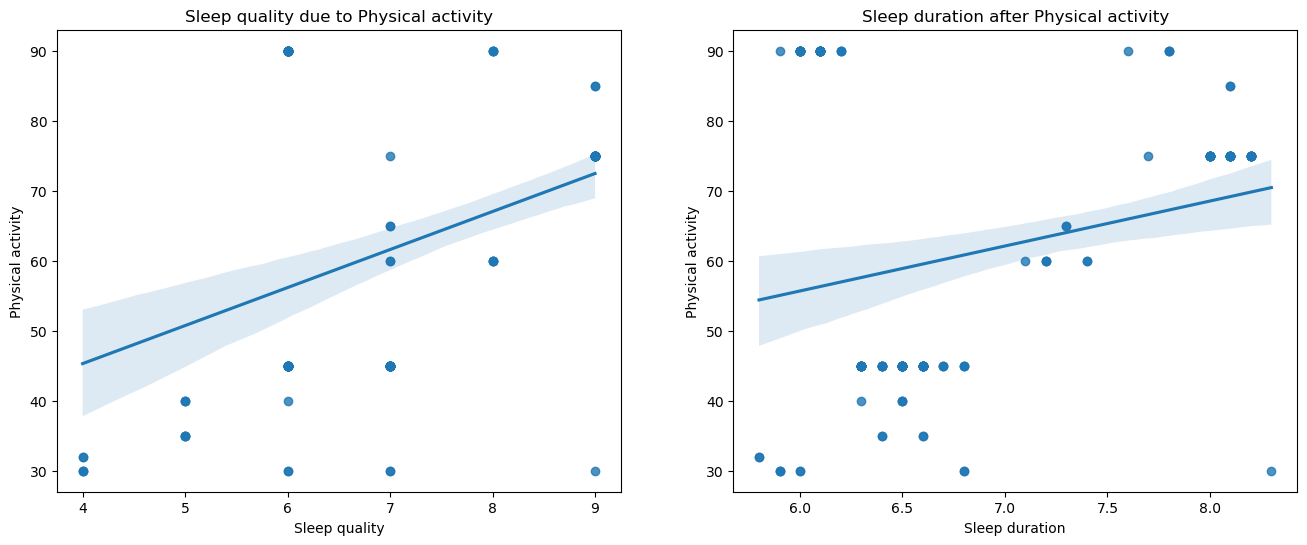

In [99]:
#Regression plots
fig, axs = plt.subplots(1,2, figsize=(16,6))

sns.regplot (data=df1, y="Physical Activity Level",x="Quality of Sleep", ax=axs[0]).set_title("Sleep quality due to Physical activity")
axs[0].set(xlabel="Sleep quality" , ylabel="Physical activity")

sns.regplot (data=df1, y="Physical Activity Level",x="Sleep Duration", ax=axs[1]).set_title("Sleep duration after Physical activity")
axs[1].set(xlabel="Sleep duration", ylabel="Physical activity")

plt.show()

#### The regression plots illustrate:

1. Positive trend between physical activity levels and quality of sleep, suggesting that that more active individuals may tend to sleep better.

2. individuals with higher physical activitytend to sleep longer as there is a corresponding uptick in sleep duration.


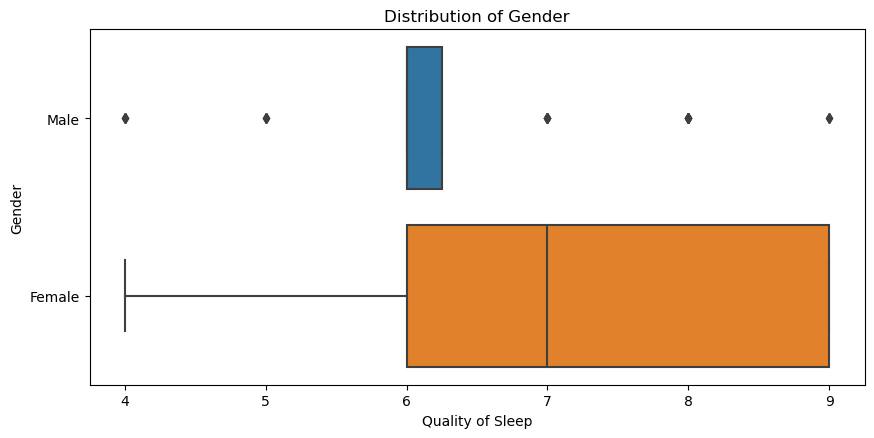

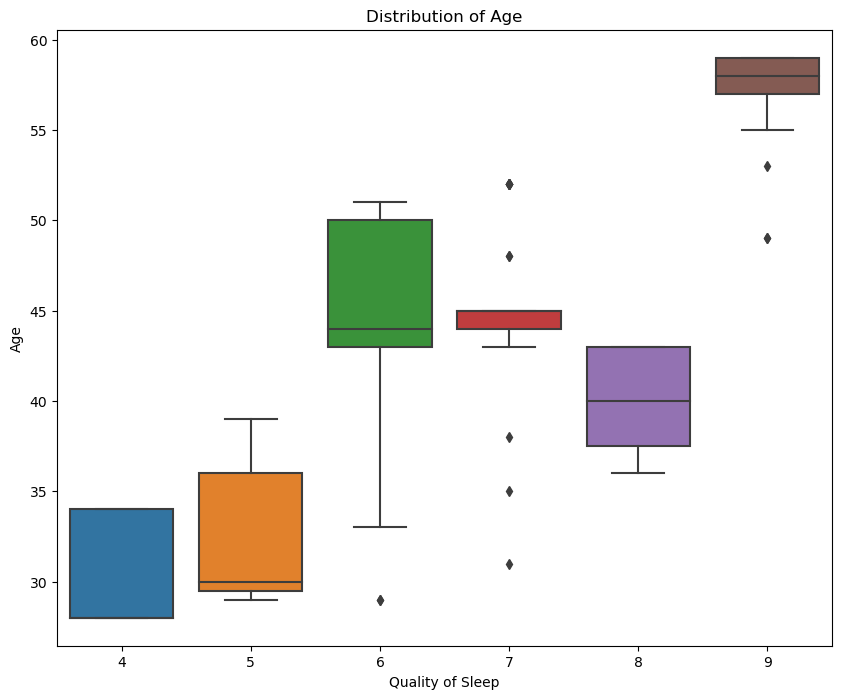

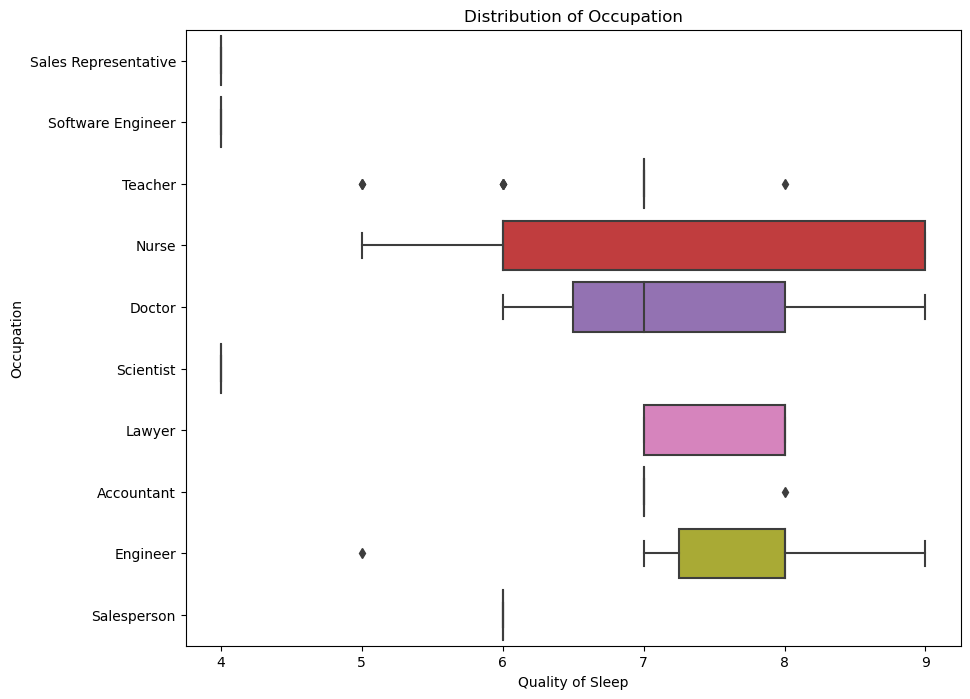

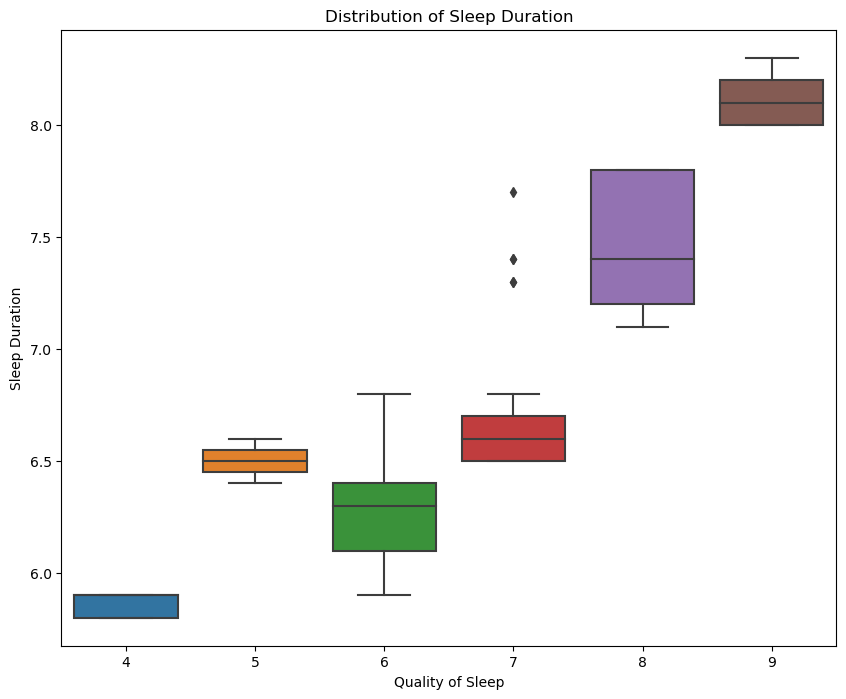

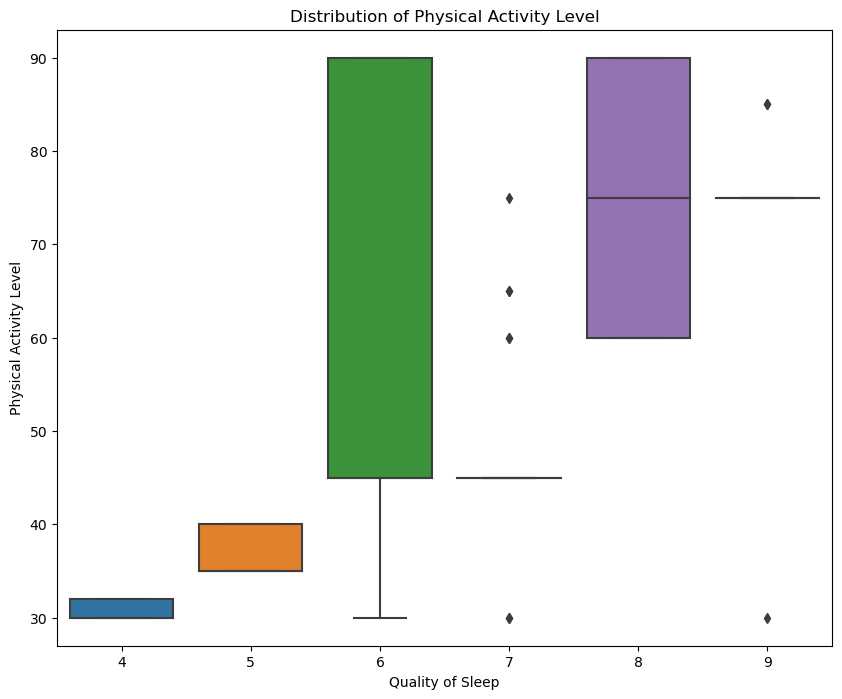

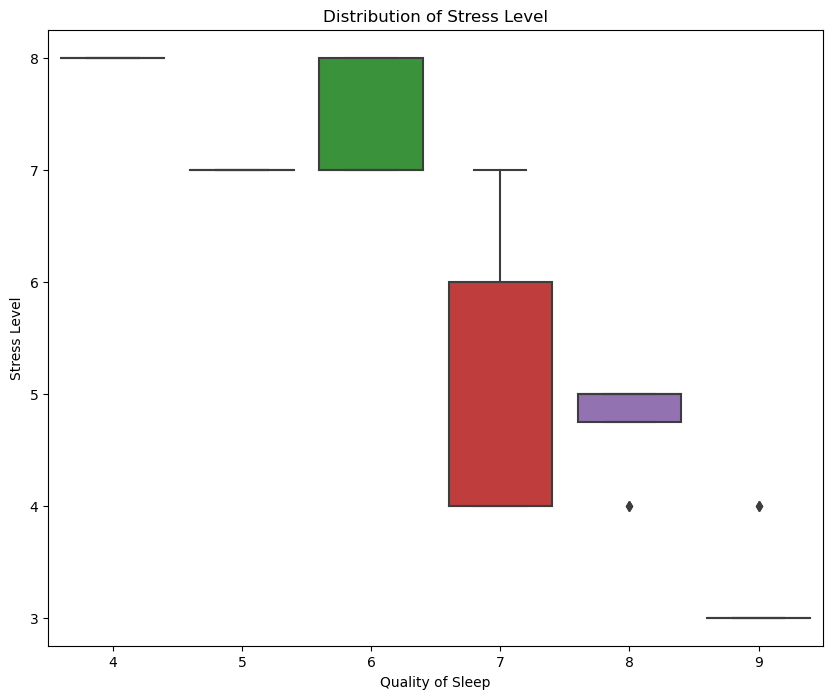

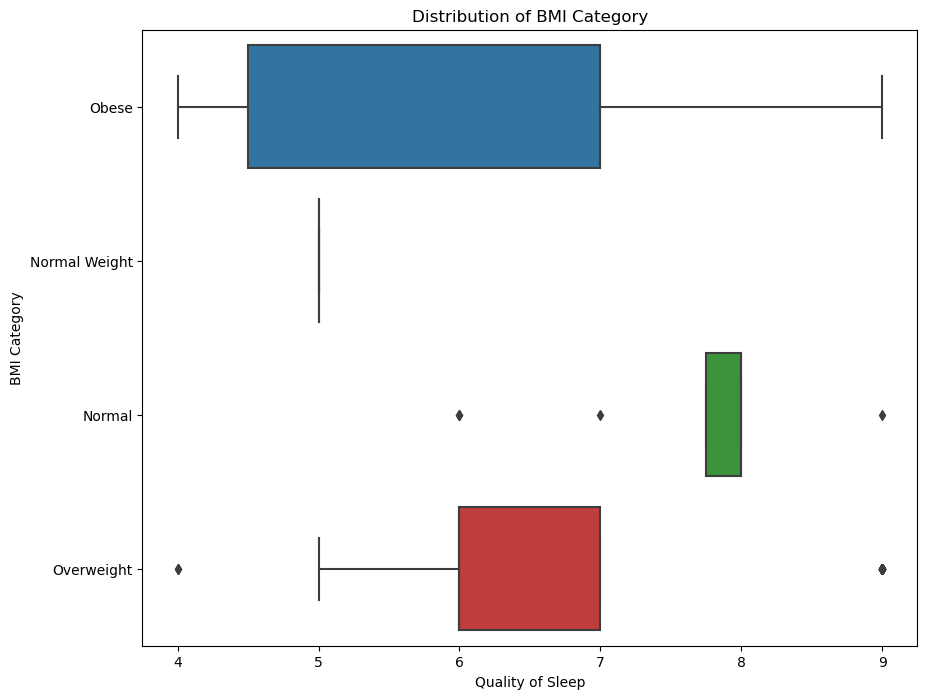

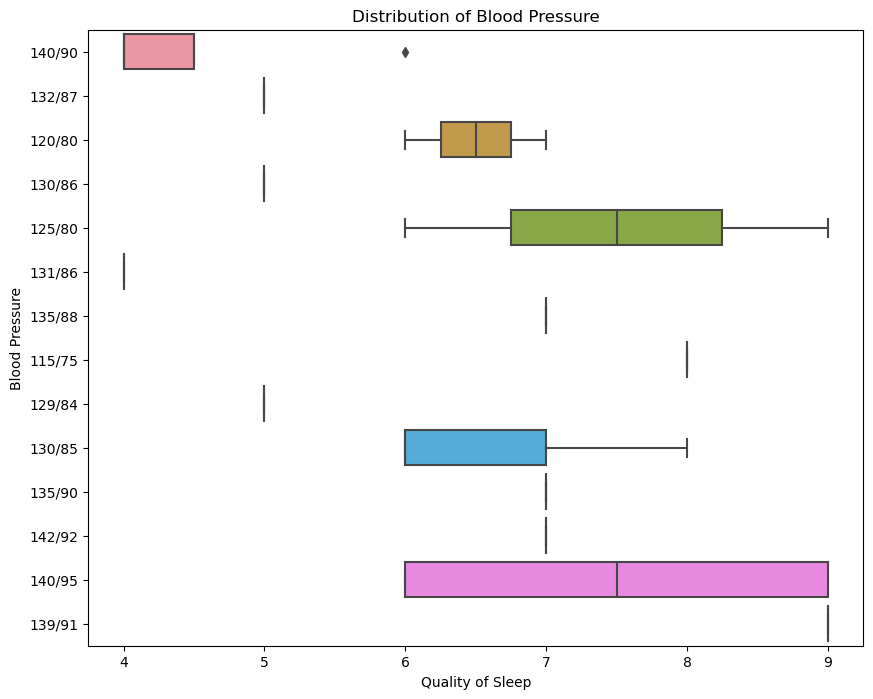

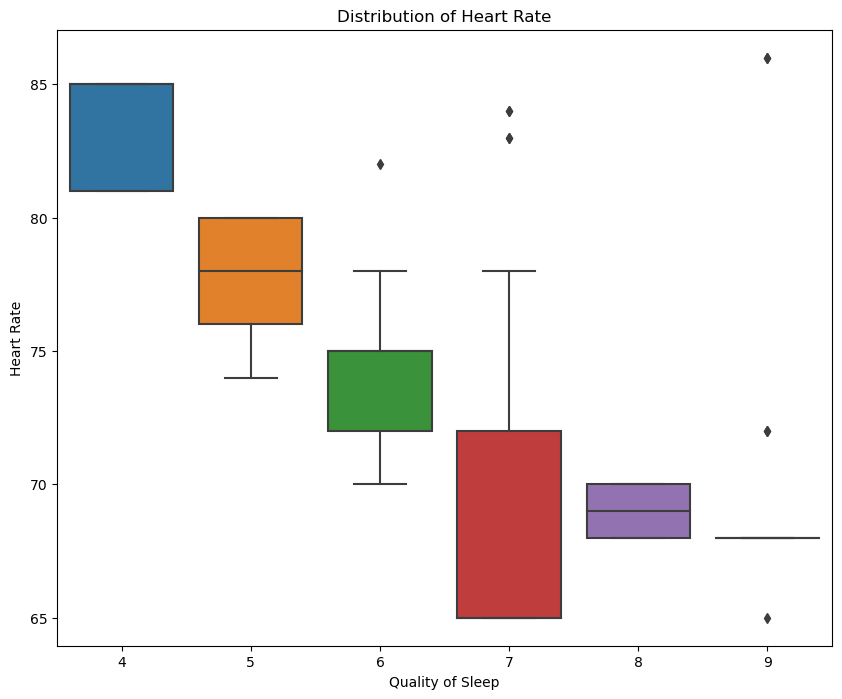

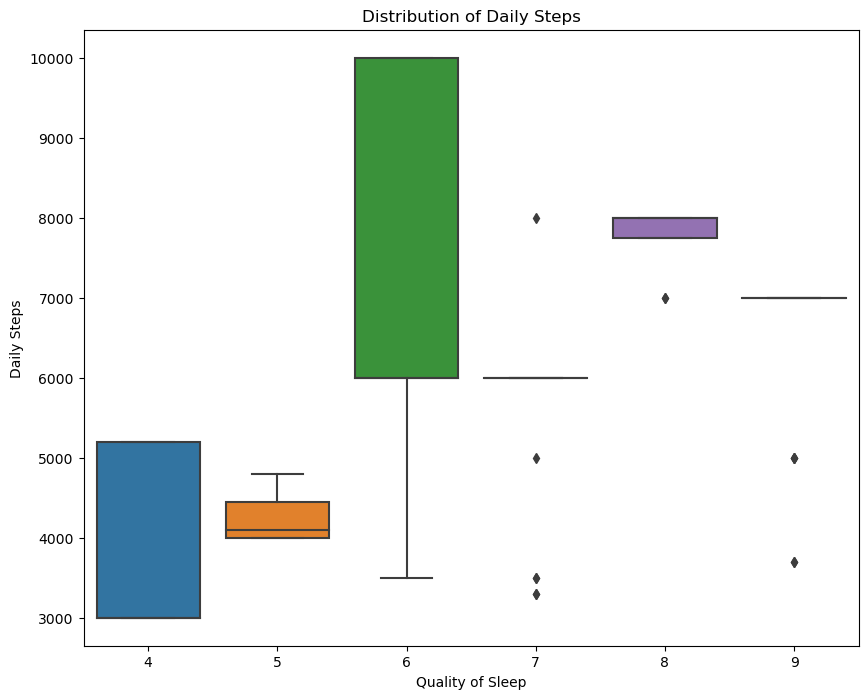

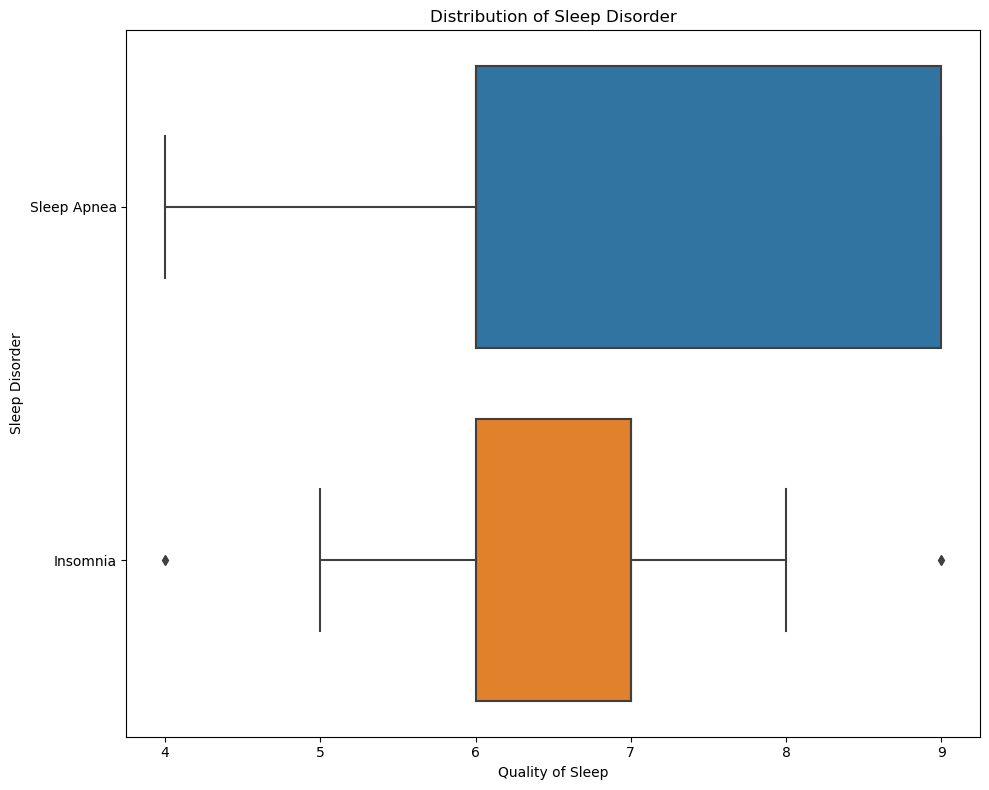

In [100]:
#Visualising outliers using boxplot
plt.figure(figsize=(10, 60))  

# Plot 1: Distribution of Gender
plt.subplot(11, 1, 1)
sns.boxplot(x='Quality of Sleep', y='Gender', data=df1)
plt.title('Distribution of Gender')

# Plot 2: Distribution of Age
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Age', data=df1)
plt.title('Distribution of Age')

# Plot 3: Distribution of Occupation
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Occupation', data=df1)
plt.title('Distribution of Occupation')

# Plot 4: Distribution of Sleep Duration
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df1)
plt.title('Distribution of Sleep Duration')

# Plot 5: Distribution of Physical Activity Level
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Physical Activity Level', data=df1)
plt.title('Distribution of Physical Activity Level')

# Plot 6: Distribution of Stress Level
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Stress Level', data=df1)
plt.title('Distribution of Stress Level')

# Plot 7: Distribution of BMI Category
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='BMI Category', data=df1)
plt.title('Distribution of BMI Category')

# Plot 8: Distribution of Blood Pressure
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Blood Pressure', data=df1)
plt.title('Distribution of Blood Pressure')

# Plot 9: Distribution of Heart Rate
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Heart Rate', data=df1)
plt.title('Distribution of Heart Rate')

# Plot 10: Distribution of Daily Steps
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Daily Steps', data=df1)
plt.title('Distribution of Daily Steps')

# Plot 11: Distribution of Sleep Disorder
plt.figure(figsize=(10, 8))  
sns.boxplot(x='Quality of Sleep', y='Sleep Disorder', data=df1)
plt.title('Distribution of Sleep Disorder')

plt.tight_layout()
plt.show()

In [101]:
#Label Encoding all Categorical Columns
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Occupation'] = label_encoder.fit_transform(df1['Occupation'])
df1['BMI Category'] = label_encoder.fit_transform(df1['BMI Category'])
df1['Sleep Disorder'] = label_encoder.fit_transform(df1['Sleep Disorder'])
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Group
3,4,1,28,5,5.9,4,30,8,2,140/90,85,3000,1,21-30
4,5,1,28,5,5.9,4,30,8,2,140/90,85,3000,1,21-30
5,6,1,28,8,5.9,4,30,8,2,140/90,85,3000,0,21-30
6,7,1,29,9,6.3,6,40,7,2,140/90,82,3500,0,21-30
16,17,0,29,4,6.5,5,40,7,1,132/87,80,4000,1,21-30


In [102]:
# Convert the new columns to float data type
df1[['BloodPressure_Upper', 'BloodPressure_Lower']] = df1['Blood Pressure'].str.split('/', expand=True)

df1['BloodPressure_Upper'] = df1['BloodPressure_Upper'].astype(float)
df1['BloodPressure_Lower'] = df1['BloodPressure_Lower'].astype(float)

# Drop the original 'Blood Pressure' column
df1 = df1.drop('Blood Pressure', axis=1)

df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Age Group,BloodPressure_Upper,BloodPressure_Lower
3,4,1,28,5,5.9,4,30,8,2,85,3000,1,21-30,140.0,90.0
4,5,1,28,5,5.9,4,30,8,2,85,3000,1,21-30,140.0,90.0
5,6,1,28,8,5.9,4,30,8,2,85,3000,0,21-30,140.0,90.0
6,7,1,29,9,6.3,6,40,7,2,82,3500,0,21-30,140.0,90.0
16,17,0,29,4,6.5,5,40,7,1,80,4000,1,21-30,132.0,87.0


In [103]:
#Display column indexes for outlier removal
for index, column in enumerate(df1.columns):
    print("Index:", index, "Column Name:", column)

Index: 0 Column Name: Person ID
Index: 1 Column Name: Gender
Index: 2 Column Name: Age
Index: 3 Column Name: Occupation
Index: 4 Column Name: Sleep Duration
Index: 5 Column Name: Quality of Sleep
Index: 6 Column Name: Physical Activity Level
Index: 7 Column Name: Stress Level
Index: 8 Column Name: BMI Category
Index: 9 Column Name: Heart Rate
Index: 10 Column Name: Daily Steps
Index: 11 Column Name: Sleep Disorder
Index: 12 Column Name: Age Group
Index: 13 Column Name: BloodPressure_Upper
Index: 14 Column Name: BloodPressure_Lower


In [104]:
# Removing outliers using IQR method
num_col_indexes = [2, 4, 5, 6, 7, 9, 10, 13, 14]

# Drop rows with missing values in selected columns
df1_subset = df1.iloc[:, num_col_indexes].dropna()

if not df1_subset.empty:
    Q1 = df1_subset.quantile(0.25)
    Q3 = df1_subset.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame based on the bounds
    df1 = df1[~((df1.iloc[:, num_col_indexes] < lower_bound) | (df1.iloc[:, num_col_indexes] > upper_bound)).any(axis=1)]
    print(df1.head())
else:
    print("No valid data after removing missing values.")

    Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
49         50       1   31           1             7.7                 7   
67         68       1   33           1             6.0                 6   
80         81       0   34           7             5.8                 4   
81         82       0   34           7             5.8                 4   
94         95       0   36           0             7.2                 8   

    Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
49                       75             6             0          70   
67                       30             8             0          72   
80                       32             8             3          81   
81                       32             8             3          81   
94                       60             4             0          68   

    Daily Steps  Sleep Disorder Age Group  BloodPressure_Upper  \
49         8000               1     31-40         

In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Select numeric columns for scaling
num_cols = df1.drop(columns=["Person ID"]).select_dtypes(include=['number']).columns

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[num_cols])

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters = model.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df1['Cluster'] = clusters

print(df1)

     Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
49          50       1   31           1             7.7                 7   
67          68       1   33           1             6.0                 6   
80          81       0   34           7             5.8                 4   
81          82       0   34           7             5.8                 4   
94          95       0   36           0             7.2                 8   
..         ...     ...  ...         ...             ...               ...   
369        370       0   59           4             8.1                 9   
370        371       0   59           4             8.0                 9   
371        372       0   59           4             8.1                 9   
372        373       0   59           4             8.1                 9   
373        374       0   59           4             8.1                 9   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
49 

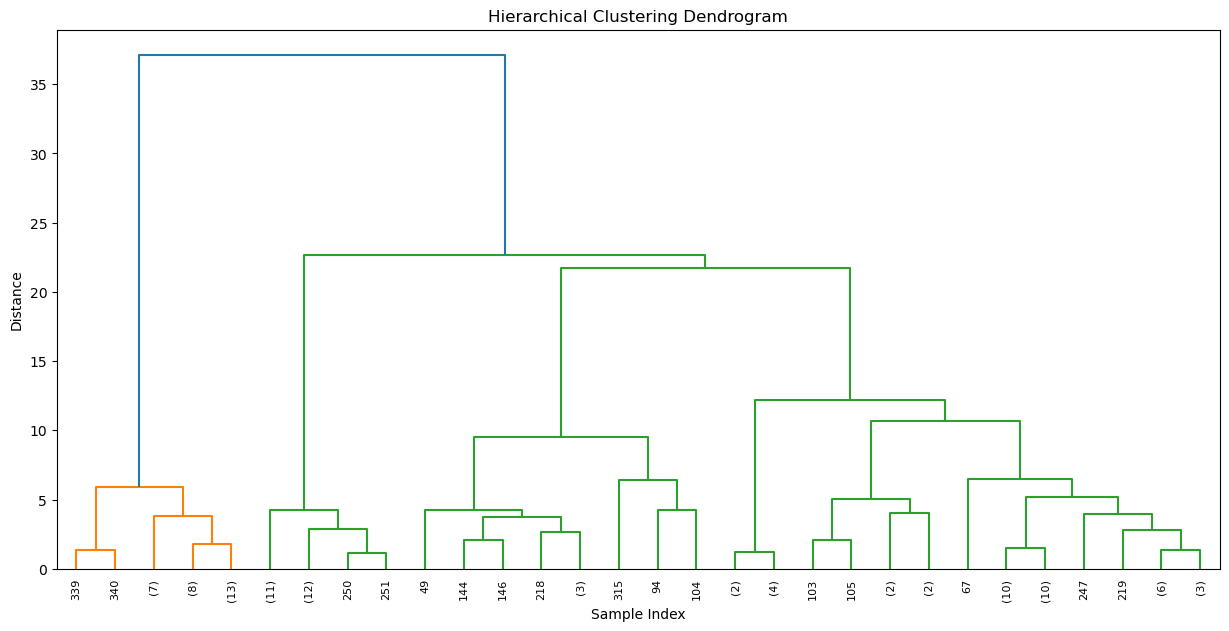

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
# numeric columns for scaling
num_cols = df1.drop(columns=["Person ID"]).select_dtypes(include=['number']).columns

# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[num_cols])

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
clusters = model.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
df1['Cluster'] = clusters

# Create a linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, labels=df1.index, leaf_rotation=90, leaf_font_size=8, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [107]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for encoding
cat_cols = df1.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df1[cat_cols])

# Convert sparse matrix to array
X_encoded = X_encoded.toarray()

# Concatenate encoded features with numeric features
X = np.concatenate((X_encoded, df1.drop(columns=["Person ID", "Sleep Disorder"])), axis=1)


In [110]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(df1[['Gender', 'Age Group']])

# Concatenate encoded features with numeric features
X_numeric = df1.drop(columns=["Person ID", "Gender", "Age Group", "Sleep Disorder"])
X = np.concatenate((X_encoded.toarray(), X_numeric), axis=1)

# Separate target variable
y = df1["Sleep Disorder"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred_logistic = logistic_reg.predict(X_test)

# Print the number of samples in X and y
print("Number of samples in X:", len(X))
print("Number of samples in y:", len(y))

# Print the number of samples in the training and testing sets
print("Number of samples in training set:", len(X_train))
print("Number of samples in testing set:", len(X_test))

# Model evaluation
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

report_logistic = classification_report(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:")
print(report_logistic)


Number of samples in X: 109
Number of samples in y: 109
Number of samples in training set: 87
Number of samples in testing set: 22
Logistic Regression Accuracy: 0.8636363636363636
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.73      1.00      0.84         8

    accuracy                           0.86        22
   macro avg       0.86      0.89      0.86        22
weighted avg       0.90      0.86      0.87        22



In [112]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables
encoder = OneHotEncoder()
age_group_encoded = encoder.fit_transform(df1[["Age Group"]])

# Concatenate encoded features with other features
X_numeric = df1.drop(columns=["Person ID", "Age Group", "Sleep Disorder"])
X = np.concatenate((age_group_encoded.toarray(), X_numeric), axis=1)

# Separate target variable
y = df1["Sleep Disorder"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = dt.predict(X_test)

# Model evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classifier Classification Report:")
print(report_dt)


Decision Tree Classifier Accuracy: 0.8181818181818182
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.75      0.75      0.75         8

    accuracy                           0.82        22
   macro avg       0.80      0.80      0.80        22
weighted avg       0.82      0.82      0.82        22



In [123]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Convert 'Age Group' to categorical dtype
df1['Age Group'] = df1['Age Group'].astype('category')

# Separate features and target variable
X = df1.drop(columns=["Sleep Disorder"])
y = df1["Sleep Disorder"]

# Define categorical columns for one-hot encoding
cat_columns = ["Age Group"]

# Define column transformer for one-hot encoding
encoder = OneHotEncoder(drop="first", sparse=False)
ct = ColumnTransformer([("onehot", encoder, cat_columns)], remainder="passthrough")

# Apply column transformation
X_encoded = ct.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for k
param_grid = {'n_neighbors': range(1, 21)}  # trying k from 1 to 20

# K-Nearest Neighbors (KNN) with hyperparameter tuning
knn = KNeighborsClassifier(weights='distance', algorithm='auto')
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best value of k
best_k = grid_search.best_params_['n_neighbors']

# Use the best model to make predictions
best_knn = grid_search.best_estimator_
y_pred_best_k = best_knn.predict(X_test_scaled)

# Evaluation
accuracy_best_k = accuracy_score(y_test, y_pred_best_k)
report_best_k = classification_report(y_test, y_pred_best_k)

print("Best k:", best_k)
print("K-Nearest Neighbors (KNN) Accuracy with best k:", accuracy_best_k)
print("Classification Report:")
print(report_best_k)



Best k: 8
K-Nearest Neighbors (KNN) Accuracy with best k: 0.9545454545454546
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.88      0.93         8

    accuracy                           0.95        22
   macro avg       0.97      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



In [115]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df1.drop(columns=["Sleep Disorder"]).values
y = df1["Sleep Disorder"].values

# Define categorical columns for one-hot encoding
cat_columns = [11]  

# Define column transformer for one-hot encoding
encoder = OneHotEncoder(drop="first", sparse=False)
ct = ColumnTransformer([("onehot", encoder, cat_columns)], remainder="passthrough")

# Apply column transformation
X_encoded = ct.fit_transform(X)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=3)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(max_depth=5, random_state=3)
model.fit(X_train_imputed, y_train)

# Make predictions
predictions = model.predict(X_test_imputed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.9090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.83      0.91        12

    accuracy                           0.91        22
   macro avg       0.92      0.92      0.91        22
weighted avg       0.92      0.91      0.91        22



1. Sleep Duration: 0.30780446549234347
2. Age: 0.25767864247777317
3. Occupation: 0.0624876860019281
4. Sleep Disorder: 0.058589274456010317
5. Stress Level: 0.052468759469763385
6. Physical Activity Level: 0.04703775879424713
7. Daily Steps: 0.045850548843291684
8. Heart Rate: 0.04105504435108213
9. Quality of Sleep: 0.03753613387466173
10. BloodPressure_Upper: 0.030850432366617213
11. BloodPressure_Lower: 0.0290611070862743
12. Gender: 0.01662157839800586
13. BMI Category: 0.012958568388001513


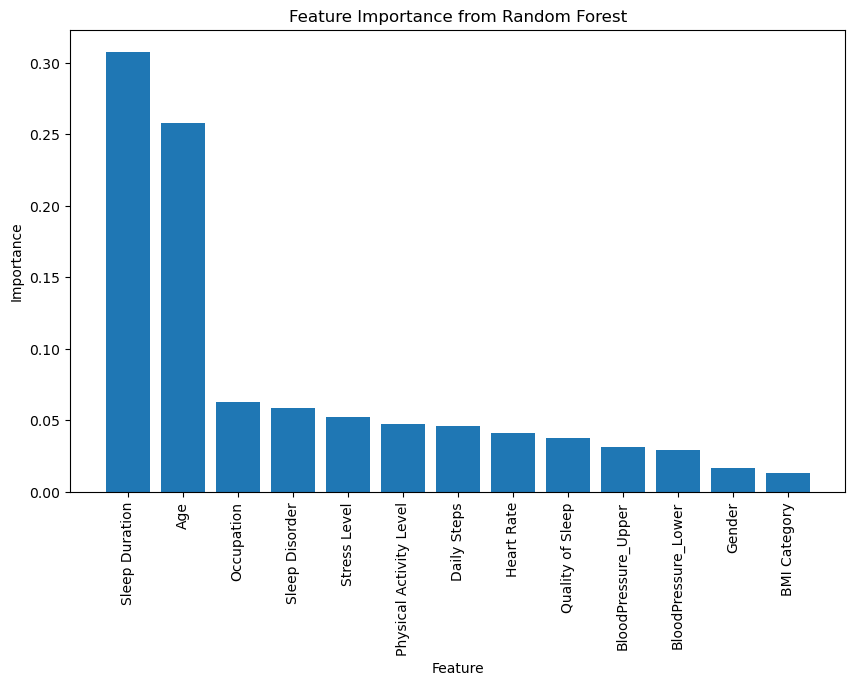

In [128]:
# Separate features (X) and target variable (y)
X = df1.drop(columns=['Person ID', 'Cluster', 'Age Group'])  # Features
y = df1['Cluster']  # Target variable

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print feature importances
for i, idx in enumerate(sorted_indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [X.columns[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()



### Feature Analysis:
1. Sleep Duration (30.78%): This indicates that the duration of sleep is the most important feature for predicting sleep-related issues.
2. Age (25.77%): Age remains a significant predictor, suggesting that age-related factors play a crucial role in sleep patterns and potential disorders.
3. Occupation (6.25%): The type of occupation continues to be an important factor, indicating that work-related stress or schedule may affect sleep.
4. Stress Level (5.25%): Stress levels remain a significant predictor, highlighting the impact of psychological factors on sleep quality.
5. Physical Activity Level (4.70%): The level of physical activity remains an important predictor, indicating the influence of exercise on sleep.
6. Daily Steps (4.59%): Daily steps continue to contribute to predicting sleep-related issues, reflecting the importance of overall physical activity.
7. Heart Rate (4.11%): Heart rate remains a relevant physiological indicator, suggesting its association with sleep patterns and potential disorders.
8. Quality of Sleep (3.75%): The subjective quality of sleep continues to be important, emphasizing its impact on overall sleep health.
9. Blood Pressure (Upper and Lower) (3.09% and 2.91%): Blood pressure indicators remain significant, indicating their potential relationship with sleep-related issues.
10. Gender (1.66%): While less influential compared to other factors, gender still plays a role in predicting sleep-related issues, highlighting potential gender-specific differences.
11. BMI Category (1.30%): Body mass index (BMI) continues to contribute to predicting sleep-related issues, indicating its association with sleep health.